In [3]:
import pandas as pd
import mysql
from connect import DatabaseConnector

In [4]:
def get_vendor_Total_Views(vendor_id):
    
    db_connector = DatabaseConnector()  # Create an instance of DatabaseConnector
    # Connect to the database
    db_connector.connect_db()
    # Get the database connection
    connection = db_connector.get_connection()

    # If connection is not established, return
    if connection is None:
        print("No connection available to summarize the database.")
        return
    cursor = connection.cursor()

    try:
        # Execute the query to calculate the total count of the specified vendor_id
        query = f"""
            SELECT COUNT(*) AS count
            FROM vendor_view_logs
            WHERE vendor_id = %s
        """
        cursor.execute(query, (vendor_id,))
        result = cursor.fetchone()

        if result:
            return result[0]  # Extract count from the result tuple
        else:
            return 0  # If no rows are found, return count as 0
    except mysql.connector.Error as e:
        print(f"Error: {e}")
        return None
    finally:
        cursor.close()
        db_connector.close_connection()

In [6]:
get_vendor_Total_Views(26)

Successfully connected to the database
Connection closed


6956

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def plot_vendor_rank_comparison(vendor_id):
    db_connector = DatabaseConnector()  # Create an instance of DatabaseConnector
    # Connect to the database
    db_connector.connect_db()
    # Get the database connection
    connection = db_connector.get_connection()

    # If connection is not established, return
    if connection is None:
        print("No connection available to retrieve vendor ranks.")
        return

    cursor = connection.cursor()

    try:
        # Execute the query to calculate the total count of views for each vendor
        query = """
            SELECT vendor_id, COUNT(*) AS total_views
            FROM vendor_view_logs
            GROUP BY vendor_id
        """
        cursor.execute(query)
        results = cursor.fetchall()

        # Sort results by total views in descending order
        sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

        # Find rank of the specified vendor
        rank = next((i+1 for i, (v_id, _) in enumerate(sorted_results) if v_id == vendor_id), None)

        if rank is not None:
            # Get the highest rank
            highest_rank = 1

            # Calculate the ratio of rank of specified vendor to highest rank
            vendor_ratio = rank / highest_rank
            highest_ratio = highest_rank / highest_rank

            # Plotting
            plt.figure(figsize=(8, 6))
            plt.bar(['Vendor', 'Highest'], [vendor_ratio, highest_ratio], color=['skyblue', 'orange'])
            plt.xlabel('Ranking')
            plt.ylabel('Rank Ratio')
            plt.title('Rank Ratio Comparison')
            plt.text(0, vendor_ratio + 0.02, f'Rank: {rank}', ha='center')
            plt.text(1, highest_ratio + 0.02, f'Highest Rank: {highest_rank}', ha='center')
            plt.ylim(0, 1.1)  # Set y-axis limit to 0-1.1 for better visualization
            plt.show()
        else:
            print("Vendor not found.")

    except mysql.connector.Error as e:
        print(f"Error: {e}")
    finally:
        cursor.close()
        db_connector.close_connection()

Successfully connected to the database


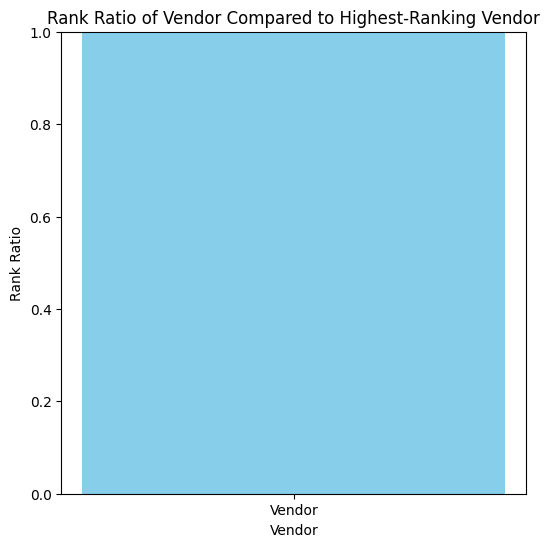

Connection closed


In [19]:
plot_vendor_rank_ratio(266)

In [10]:
def get_vendor_rank(vendor_id):
    db_connector = DatabaseConnector()  # Create an instance of DatabaseConnector
    # Connect to the database
    db_connector.connect_db()
    # Get the database connection
    connection = db_connector.get_connection()

    # If connection is not established, return
    if connection is None:
        print("No connection available to retrieve vendor ranks.")
        return

    cursor = connection.cursor()

    try:
        # Execute the query to calculate the total count of views for each vendor
        query = """
            SELECT vendor_id, COUNT(*) AS total_views
            FROM vendor_view_logs
            GROUP BY vendor_id
        """
        cursor.execute(query)
        results = cursor.fetchall()

        # Sort results by total views in descending order
        sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

        # Find rank of the specified vendor
        rank = next((i+1 for i, (v_id, _) in enumerate(sorted_results) if v_id == vendor_id), None)

        return rank

    except mysql.connector.Error as e:
        print(f"Error: {e}")
    finally:
        cursor.close()
        db_connector.close_connection()

# Example usage
vendor_id = 266  # Replace with the actual vendor ID
rank = get_vendor_rank(vendor_id)
if rank is not None:
    print(f"Rank of vendor {vendor_id} based on total views: {rank}")
else:
    print("Vendor not found or error occurred.")


Successfully connected to the database
Connection closed
Rank of vendor 266 based on total views: 54
